In [12]:
import tensorflow as tf
# Load the dataset, resizing and batching within the function
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'synthetic_digits',
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
    seed=42,
    validation_split=0.25,
    subset="training"
)

# Load the test dataset with the same function
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'synthetic_digits',
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
    seed=42,
    validation_split=0.25,
    subset="validation"
)


Found 1000 files belonging to 10 classes.
Using 750 files for training.
Found 1000 files belonging to 10 classes.
Using 250 files for validation.


In [13]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
dataset = dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

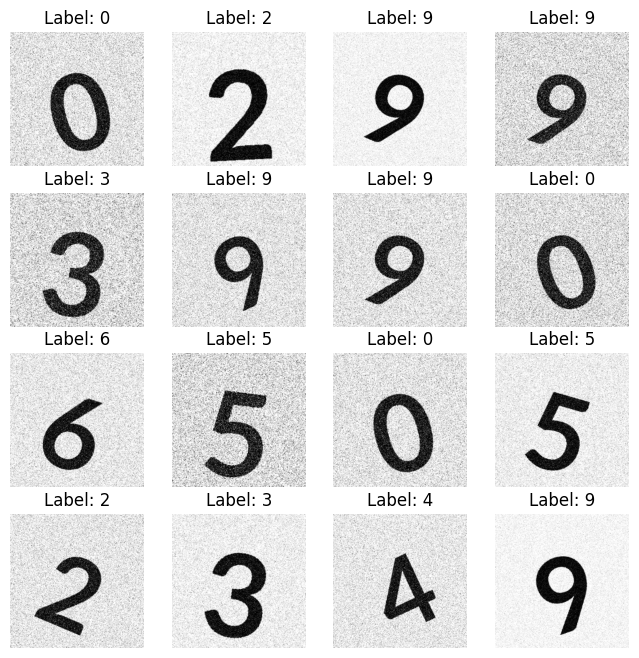

In [14]:
import matplotlib.pyplot as plt
# Get a batch of images and labels
for images, labels in dataset.take(1):  # Take one batch from the dataset
    plt.figure(figsize=(8, 8))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(tf.squeeze(images[i]), cmap='gray')  # Squeeze to remove single color channel
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis('off')
    plt.show()

In [15]:
#Build a sequential model using CNN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
modeled = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256,256, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 10 classes for digit recognition (0-9)
])

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compile the model
modeled.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history= modeled.fit(dataset, validation_data=test_dataset, epochs=10)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.1706 - loss: 8.8065 - val_accuracy: 0.7760 - val_loss: 1.3880
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8872 - loss: 0.7331 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 2.0075e-04
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 1.0000 - loss: 1.1979e-04 - val_accuracy: 1.0000 - val_loss: 1.0758e-04
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 1.0000 - loss: 6.8489e-05 - val_accuracy: 1.0000 - val_loss: 8.5023e-05
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 1000ms/step - accuracy: 1.0000 - loss: 4.0783e-05 - val_accuracy: 1.0000 - val_loss: 5.3026e-05
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 1.0000 - loss: 3.1685e-05 - val_accuracy: 1.0000 - val_loss: 5.5948e-05
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 1.0000 - loss: 2

In [17]:
# save the model for further use
modeled.save('synthetic_digit_recognition_model.h5')

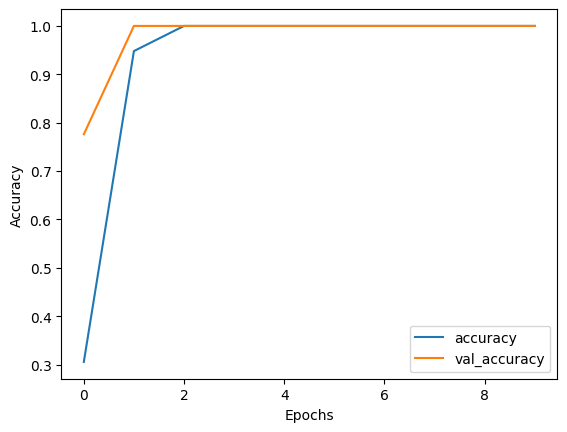

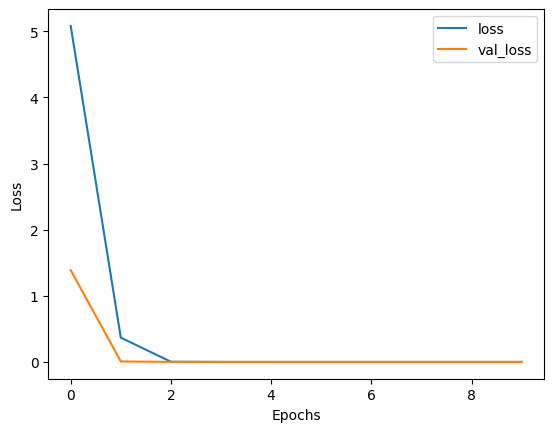

In [21]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()